## Eghan Evander Nana Bosomefi

## nanachief29@gmail.com

### Loading packages

In [96]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
Xb, yb = load_boston(return_X_y=True)
data_boston = pd.DataFrame(Xb,columns=load_boston().feature_names)
data_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
data_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [4]:
data_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [5]:
data_boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

## Histogram of all variables in the dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2beac1fcc0>,
      dtype=object)

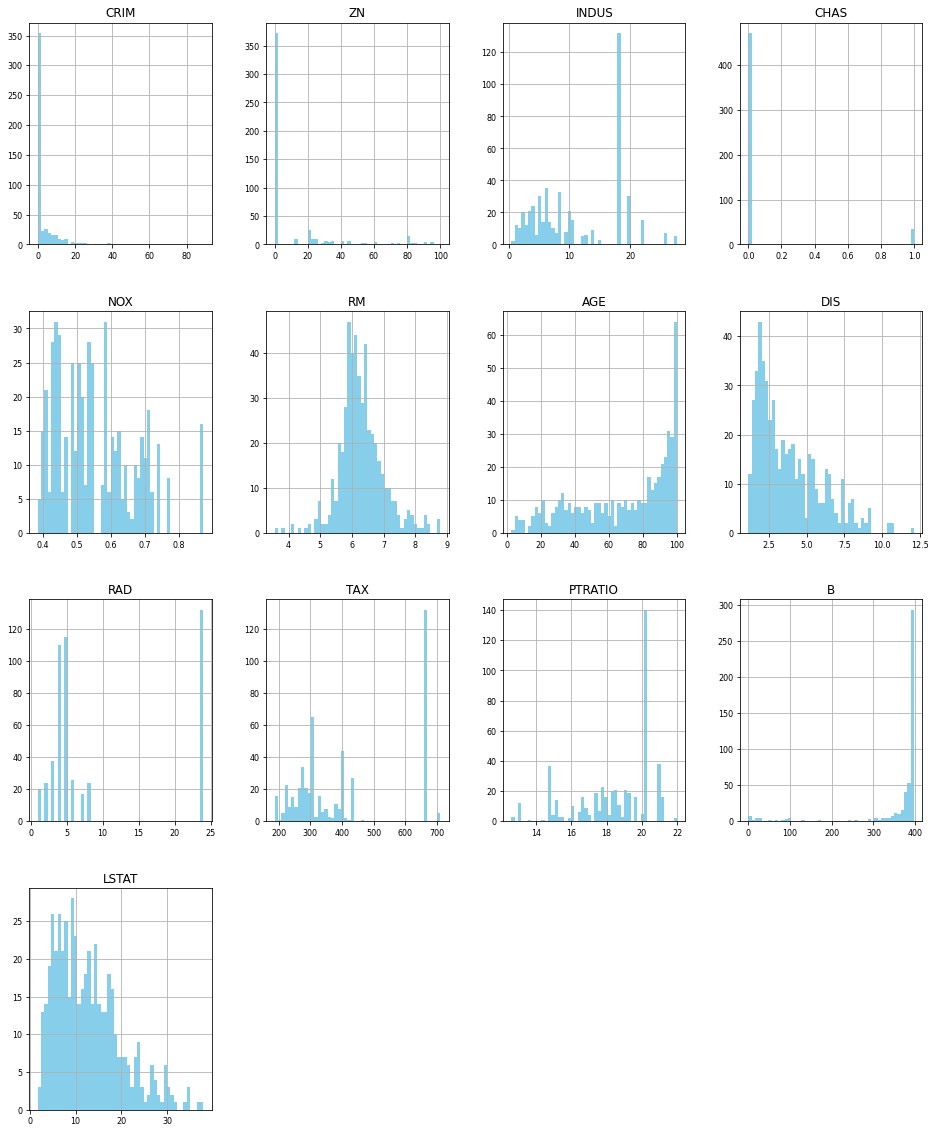

In [6]:
data_boston.hist(figsize=(16,20),color="skyblue" ,xlabelsize=8,ylabelsize=8,bins=50)

### Heat map showing the correlation between features

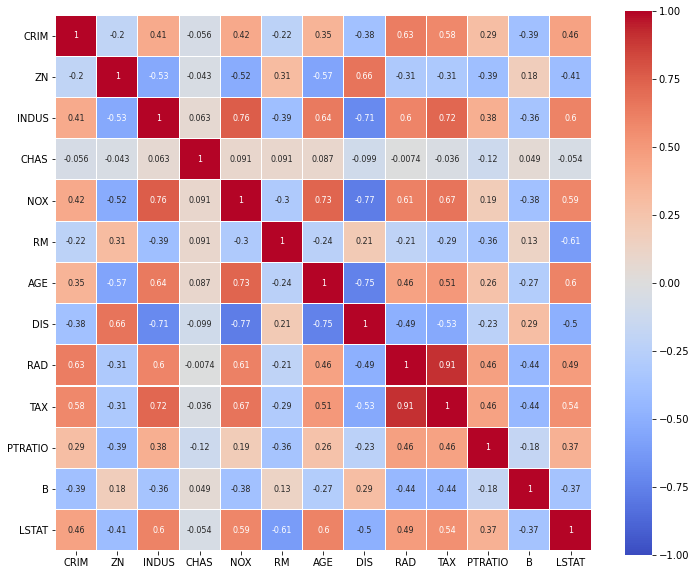

In [7]:
#Correlation of the features
corr_matrix = data_boston.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size":8}, square=True)


## Spliting dataset into Training and Test

In [85]:
# Spliting dataset using train_test_split
X_train,X_test,y_train,y_test = train_test_split(Xb,yb, test_size=0.3,random_state=123)

## Regularized Ridge Regression


In [107]:
#alpha factor here is lambda (penalty term) which helps to reduce the magnitude of coeff

#prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001])

#create and fit a ridge regression model, testing each alpha
ridge_model = Ridge()
grid = GridSearchCV(estimator=ridge_model,param_grid=dict(alpha=alphas))
grid.fit(X_train,y_train)
ridge_model.fit(X_train,y_train)

#print(grid)

#Summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

#print(f'Ridge model coef: {ridge_model.coef_}')
#As the data has 10 columns hence 10 coefficients appear here 

0.7353365134572931
0.1


In [112]:
y_pred_train=grid.predict(X_train) #predictions on training data
y_pred = grid.predict(X_test) #predictions on testing data

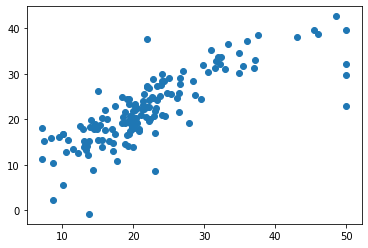

In [113]:
plt.scatter(y_test,y_pred)

In [114]:
mse = mean_squared_error(y_test,y_pred)
print('Mean Square Error:',mse)
rsq = r2_score(y_train,y_pred_train)
print('R-square, Training: ',rsq)
rsq = r2_score(y_test,y_pred)
print('R-square, Testing: ',rsq)

Mean Square Error: 28.521323939345322
R-square, Training:  0.764659624157324
R-square, Testing:  0.6471359975325128


In [115]:
#Let's get the coefficients
print('Intercept: ',ridge_model.intercept_) # This gives us the intercept term
print('Coefficients: \n',ridge_model.coef_) # This gives us the coefficients (in the case of this model, just one coefficient)

Intercept:  24.15744934266324
Coefficients: 
 [-9.74454067e-02  4.03111313e-02  4.83171377e-02  1.45682625e-01
 -7.17092486e+00  4.87770559e+00 -1.34564715e-02 -1.21808099e+00
  2.51346265e-01 -1.35260865e-02 -8.86380298e-01  6.67058056e-03
 -4.95625269e-01]


In [118]:
print("Accuracy of train:",grid.score(X_train,y_train))
print("Accuracy of test:",grid.score(X_test,y_test))

Accuracy of train: 0.764659624157324
Accuracy of test: 0.6471359975325128


###### Bias for training = 1-0.76 = 0.24
###### Bias for test = 1-0.65 = 0.35

###### Variance = test bias - training bias =0.35-0.24=0.11


##### Underfitting